<a href="https://colab.research.google.com/github/TimkaThymineTimiryazevskaya/sf_data_science/blob/main/HH_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [307]:
import pandas as pd
import numpy as np
from google.colab import drive

In [308]:
hh_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dst-3.0_16_1_hh_database.csv',sep=';')

In [309]:
hh_data.shape
hh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

In [310]:
hh_data.head()

Пол, возраст           ЗП  \
0    Мужчина ,  39 лет , родился 27 ноября 1979   29000 руб.   
1     Мужчина ,  60 лет , родился 20 марта 1959   40000 руб.   
2  Женщина ,  36 лет , родилась 12 августа 1982   20000 руб.   
3      Мужчина ,  38 лет , родился 25 июня 1980  100000 руб.   
4     Женщина ,  26 лет , родилась 3 марта 1993  140000 руб.   

                           Ищет работу на должность:  \
0                            Системный администратор   
1                               Технический писатель   
2                                           Оператор   
3  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4                  Региональный менеджер по продажам   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   
1  Королев , не готов к переезду , готов к редким...   
2  Тверь , не готова к переезду , не готова к ком...   
3  Саратов , не готов к переезду , готов к редким...   
4  Москва , не готова к переезду , готова к коман...   

                                           Занятость  \
0  частичная занятость, проектная работа, полная ...   
1  частичная занятость, проектная работа, полная ...   
2                                   полная занятость   
3  частичная занятость, проектная работа, полная ...   
4                                   полная занятость   

                                              График  \
0  гибкий график, полный день, сменный график, ва...   
1  гибкий график, полный день, сменный график, уд...   
2                                        полный день   
3                    гибкий график, удаленная работа   
4                                        полный день   

                                         Опыт работы  \
0  Опыт работы 16 лет 10 месяцев  Август 2010 — п...   
1  Опыт работы 19 лет 5 месяцев  Январь 2000 — по...   
2  Опыт работы 10 лет 3 месяца  Октябрь 2004 — Де...   
3  Опыт работы 18 лет 9 месяцев  Август 2017 — Ап...   
4  Опыт работы 5 лет 7 месяцев  Региональный мене...   

  Последнее/нынешнее место работы  \
0         МАОУ "СОШ № 1 г.Немана"   
1    Временный трудовой коллектив   
2                    ПАО Сбербанк   
3                        OpenSoft   
4                        Мармелад   

                       Последняя/нынешняя должность  \
0                           Системный администратор   
1  Менеджер проекта, Аналитик, Технический писатель   
2                               Кассир-операционист   
3                               Инженер-программист   
4                              Менеджер по продажам   

                                   Образование и ВУЗ Обновление резюме  \
0  Неоконченное высшее образование 2000  Балтийск...  16.04.2019 15:59   
1  Высшее образование 1981  Военно-космическая ак...  12.04.2019 08:42   
2  Среднее специальное образование 2002 Профессио...  16.04.2019 08:35   
3  Высшее образование 2002  Саратовский государст...  08.04.2019 14:23   
4  Высшее образование 2015 Кгу Психологии и педаг...  22.04.2019 10:32   

                             Авто  
0  Имеется собственный автомобиль  
1                      Не указано  
2                      Не указано  
3                      Не указано  
4                      Не указано

In [311]:
hh_data['Опыт работы'].nunique()

44413

In [312]:
hh_data['Последняя/нынешняя должность'].mode()

0    Системный администратор
dtype: object

In [313]:
def education(x):
  x = str(x)
  a = x.split()
  if a[1] == 'образование':
    b = a[0]+a[1];
    c = int(a[2]);
    d = a[3:]
  elif a[2] == 'образование':
    b = a[0:3]
    c = int(a[3])
    d = a[4:]
  return a
hh_data['Образование'] = hh_data['Образование и ВУЗ'].apply(lambda x: str(x).split()[0]+' '+str(x).split()[1] if str(x).split()[1]=='образование' else str(x).split()[0]+' '+str(x).split()[1]+' '+str(x).split()[2])
display(hh_data['Образование'])

0        Неоконченное высшее образование
1                     Высшее образование
2        Среднее специальное образование
3                     Высшее образование
4                     Высшее образование
                      ...               
44739                 Высшее образование
44740                 Высшее образование
44741                 Высшее образование
44742                 Высшее образование
44743                 Высшее образование
Name: Образование, Length: 44744, dtype: object

In [314]:
hh_data['Образование'].value_counts()

Высшее образование                 33863
Среднее специальное образование     5765
Неоконченное высшее образование     4557
Среднее образование                  559
Name: Образование, dtype: int64

In [315]:
hh_data = hh_data.drop(columns = 'Образование и ВУЗ')

In [316]:
hh_data['Пол'] = hh_data['Пол, возраст'].apply(lambda x: 'М' if str(x).split()[0]=='Мужчина' else 'Ж')

In [317]:
hh_data['Возраст'] = hh_data['Пол, возраст'].apply(lambda x: int(str(x).split()[2]))

In [318]:
hh_data['Пол'].value_counts(normalize=True)
hh_data['Возраст'].mean()

32.19674146254246

In [319]:
hh_data = hh_data.drop(columns = 'Пол, возраст')

In [320]:
def expir(x):
  a = 0
  x = str(x)
  if x.split()[0] != 'Опыт':
    return None
  x = x.split()
  if (x[3] == 'год') or (x[3] == 'лет') or (x[3] == 'года'):
    a= a + int(x[2])*12
  if x[3] == ('месяц') or (x[3] == 'месяцев') or (x[3] == 'месяца'):
    a+=int(x[2])
  elif (x[5] == 'месяц') or (x[5] == 'месяцев') or (x[3] == 'месяца'):
    a+=int(x[4])
  return (a)

In [321]:
hh_data['Опыт_месяц'] = hh_data['Опыт работы'].apply(lambda x: expir(x))
hh_data['Опыт_месяц'].median()
hh_data['Опыт_месяц'].max()

1188.0

In [322]:
hh_data = hh_data.drop(columns = 'Опыт работы')

In [323]:
def reloc_city(x):
  x = x.split()
  a = x[0]
  million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград' ]
  if a == 'Москва':
    return 'Москва'
  elif a == 'Санкт-Петербург':
    return 'Санкт-Петербург'
  elif a in million_cities:
    return 'город-миллионник';
  else:
    return 'другое'
  return a
hh_data['Город'] = hh_data['Город, переезд, командировки'].apply(reloc_city)
hh_data['Город'].value_counts(normalize = True)

Москва              0.371469
другое              0.367692
город-миллионник    0.150501
Санкт-Петербург     0.110339
Name: Город, dtype: float64

In [324]:
def reloc(x):
  x = x.split()

  for index, item in enumerate (x):
        if (item == 'переезду') or (item == 'переехать'):
            if x[index-3] != 'не':
              return True
            else:
              return False 
hh_data['Переезд'] = hh_data['Город, переезд, командировки'].apply(reloc)
hh_data['Переезд'].value_counts(normalize = True)

False    0.641851
True     0.358149
Name: Переезд, dtype: float64

In [325]:
def moving(x):
  x = x.split()

  for index, item in enumerate (x):
        if item == 'командировкам':
            if (x[index-3] != 'не'):
              return True
            else:
              return False
hh_data['Командировки'] = hh_data['Город, переезд, командировки'].apply(moving)
hh_data['Командировки'].value_counts(normalize = True) 

True     0.708337
False    0.291663
Name: Командировки, dtype: float64

In [326]:
hh_data['Переезд и Ком'] = hh_data['Командировки'] * hh_data['Переезд']
hh_data['Переезд и Ком'].value_counts(normalize = True) 

0    0.680801
1    0.319199
Name: Переезд и Ком, dtype: float64

In [327]:
hh_data = hh_data.drop(columns = 'Город, переезд, командировки')

In [328]:
employments = ['полная занятость', 'частичная занятость',
              'проектная работа', 'волонтерство', 'стажировка']
charts = ['полный день', 'сменный график', 
         'гибкий график', 'удаленная работа',
         'вахтовый метод']
for employment, chart in zip(employments, charts):
    hh_data[employment] = hh_data['Занятость'].apply(lambda x: employment in x)
    hh_data[chart] = hh_data['График'].apply(lambda x: chart in x)
hh_data = hh_data.drop('Занятость', axis=1)
hh_data = hh_data.drop('График', axis=1)
print(hh_data[hh_data['проектная работа'] & hh_data['волонтерство']].shape[0])
print(hh_data[hh_data['вахтовый метод'] & hh_data['гибкий график']].shape[0])
display(hh_data)

436
2311


ЗП                          Ищет работу на должность:  \
0       29000 руб.                            Системный администратор   
1       40000 руб.                               Технический писатель   
2       20000 руб.                                           Оператор   
3      100000 руб.  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4      140000 руб.                  Региональный менеджер по продажам   
...            ...                                                ...   
44739   50000 руб.  Финансист, аналитик, экономист, бухгалтер, мен...   
44740   39000 руб.             Системный администратор, IT-специалист   
44741   40000 руб.                         Аналитик данных, Математик   
44742   20000 руб.                                   Контент-менеджер   
44743  120000 руб.                               Руководитель проекта   

                         Последнее/нынешнее место работы  \
0                                МАОУ "СОШ № 1 г.Немана"   
1                           Временный трудовой коллектив   
2                                           ПАО Сбербанк   
3                                               OpenSoft   
4                                               Мармелад   
...                                                  ...   
44739  ООО "IAS" (независимый участник объединения Ru...   
44740                                       ИП Пестрецов   
44741  ОАО «ЧМК», Исследовательско-Технологический Це...   
44742                                          IQ-Maxima   
44743                                  ПАО ГК ТНС энерго   

                           Последняя/нынешняя должность Обновление резюме  \
0                               Системный администратор  16.04.2019 15:59   
1      Менеджер проекта, Аналитик, Технический писатель  12.04.2019 08:42   
2                                   Кассир-операционист  16.04.2019 08:35   
3                                   Инженер-программист  08.04.2019 14:23   
4                                  Менеджер по продажам  22.04.2019 10:32   
...                                                 ...               ...   
44739                            Руководитель субгруппы  22.04.2019 12:32   
44740                                   Предприниматель  22.04.2019 13:11   
44741                        Начальник группы аналитики  09.04.2019 05:07   
44742                                 Менеджер проектов  26.04.2019 14:25   
44743         Руководитель отдела технической поддержки  05.07.2018 20:15   

                                 Авто                      Образование Пол  \
0      Имеется собственный автомобиль  Неоконченное высшее образование   М   
1                          Не указано               Высшее образование   М   
2                          Не указано  Среднее специальное образование   Ж   
3                          Не указано               Высшее образование   М   
4                          Не указано               Высшее образование   Ж   
...                               ...                              ...  ..   
44739                      Не указано               Высшее образование   М   
44740                      Не указано               Высшее образование   М   
44741                      Не указано               Высшее образование   Ж   
44742  Имеется собственный автомобиль               Высшее образование   М   
44743                      Не указано               Высшее образование   М   

       Возраст  Опыт_месяц  ... полная занятость  полный день  \
0           39       202.0  ...             True         True   
1           60       233.0  ...             True         True   
2           36       120.0  ...             True         True   
3           38       225.0  ...             True        False   
4           26        67.0  ...             True         True   
...        ...         ...  ...              ...          ...   
44739       30        91.0  ...             True         True   
44740       27        84.0  ...     

In [330]:
data_cur = pd.read_csv('/content/ExchangeRates.zip', sep=',')

data_cur['date'] = pd.to_datetime(data_cur['date'])
data_cur.head()

currency per       date   time    close  vol  proportion
0      USD   D 2017-12-29  00:00  57.6291    0           1
1      USD   D 2017-12-30  00:00  57.6002    0           1
2      USD   D 2017-12-31  00:00  57.6002    0           1
3      USD   D 2018-01-01  00:00  57.6002    0           1
4      USD   D 2018-02-01  00:00  57.6002    0           1

In [331]:
import datetime as dt
hh_data['Обновление резюме'] = pd.to_datetime(hh_data['Обновление резюме'])
hh_data['Обновление резюме'] = hh_data['Обновление резюме'].dt.date
hh_data['Обновление резюме'] = pd.to_datetime(hh_data['Обновление резюме'])
display(hh_data['Обновление резюме'])

0       2019-04-16
1       2019-12-04
2       2019-04-16
3       2019-08-04
4       2019-04-22
           ...    
44739   2019-04-22
44740   2019-04-22
44741   2019-09-04
44742   2019-04-26
44743   2018-05-07
Name: Обновление резюме, Length: 44744, dtype: datetime64[ns]

In [332]:
def cur(x):
  x =x.split()
  if x[1] == 'руб.':
    return 'RUB'
  elif x[1] == 'грн.':
    return 'UAH'
  elif x[1] == 'бел.руб.':
    return 'BYN'
  elif x[1] == 'сум':
    return 'UZS'
  else:
    return x[1]
def money(x):
  return int(x.split()[0])
hh_data['валюта'] = hh_data['ЗП'].apply(cur)
hh_data['деньги'] = hh_data['ЗП'].apply(money)
hh_data['валюта'].value_counts()

RUB    42471
KZT     1108
USD      628
BYN      329
EUR      106
UAH       73
UZS       20
KGS        6
AZN        3
Name: валюта, dtype: int64

In [333]:
hh_data = hh_data.merge(data_cur, how = 'left', left_on = ['Обновление резюме', 'валюта'], right_on = ['date', 'currency'])
hh_data['close'] = hh_data['close'].fillna(1)
hh_data['proportion'] = hh_data['proportion'].fillna(1)
display(hh_data)

ЗП                          Ищет работу на должность:  \
0       29000 руб.                            Системный администратор   
1       40000 руб.                               Технический писатель   
2       20000 руб.                                           Оператор   
3      100000 руб.  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4      140000 руб.                  Региональный менеджер по продажам   
...            ...                                                ...   
44739   50000 руб.  Финансист, аналитик, экономист, бухгалтер, мен...   
44740   39000 руб.             Системный администратор, IT-специалист   
44741   40000 руб.                         Аналитик данных, Математик   
44742   20000 руб.                                   Контент-менеджер   
44743  120000 руб.                               Руководитель проекта   

                         Последнее/нынешнее место работы  \
0                                МАОУ "СОШ № 1 г.Немана"   
1                           Временный трудовой коллектив   
2                                           ПАО Сбербанк   
3                                               OpenSoft   
4                                               Мармелад   
...                                                  ...   
44739  ООО "IAS" (независимый участник объединения Ru...   
44740                                       ИП Пестрецов   
44741  ОАО «ЧМК», Исследовательско-Технологический Це...   
44742                                          IQ-Maxima   
44743                                  ПАО ГК ТНС энерго   

                           Последняя/нынешняя должность Обновление резюме  \
0                               Системный администратор        2019-04-16   
1      Менеджер проекта, Аналитик, Технический писатель        2019-12-04   
2                                   Кассир-операционист        2019-04-16   
3                                   Инженер-программист        2019-08-04   
4                                  Менеджер по продажам        2019-04-22   
...                                                 ...               ...   
44739                            Руководитель субгруппы        2019-04-22   
44740                                   Предприниматель        2019-04-22   
44741                        Начальник группы аналитики        2019-09-04   
44742                                 Менеджер проектов        2019-04-26   
44743         Руководитель отдела технической поддержки        2018-05-07   

                                 Авто                      Образование Пол  \
0      Имеется собственный автомобиль  Неоконченное высшее образование   М   
1                          Не указано               Высшее образование   М   
2                          Не указано  Среднее специальное образование   Ж   
3                          Не указано               Высшее образование   М   
4                          Не указано               Высшее образование   Ж   
...                               ...                              ...  ..   
44739                      Не указано               Высшее образование   М   
44740                      Не указано               Высшее образование   М   
44741                      Не указано               Высшее образование   Ж   
44742  Имеется собственный автомобиль               Высшее образование   М   
44743                      Не указано               Высшее образование   М   

       Возраст  Опыт_месяц  ... вахтовый метод  валюта  деньги currency  per  \
0           39       202.0  ...           True     RUB   29000      NaN  NaN   
1           60       233.0  ...          False     RUB   40000      NaN  NaN   
2           36       120.0  ...          False     RUB   20000      NaN  NaN   
3           38       225.0  ...          False     RUB  100000      NaN  NaN   
4           26        67.0  ...          False     RUB  140000      NaN  NaN   
...        ...         ...  ...            ...     ...     ...      ...  ...

In [334]:
hh_data = hh_data.drop(columns=['ЗП',  'per'])
display(hh_data)

Ищет работу на должность:  \
0                                Системный администратор   
1                                   Технический писатель   
2                                               Оператор   
3      Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4                      Региональный менеджер по продажам   
...                                                  ...   
44739  Финансист, аналитик, экономист, бухгалтер, мен...   
44740             Системный администратор, IT-специалист   
44741                         Аналитик данных, Математик   
44742                                   Контент-менеджер   
44743                               Руководитель проекта   

                         Последнее/нынешнее место работы  \
0                                МАОУ "СОШ № 1 г.Немана"   
1                           Временный трудовой коллектив   
2                                           ПАО Сбербанк   
3                                               OpenSoft   
4                                               Мармелад   
...                                                  ...   
44739  ООО "IAS" (независимый участник объединения Ru...   
44740                                       ИП Пестрецов   
44741  ОАО «ЧМК», Исследовательско-Технологический Це...   
44742                                          IQ-Maxima   
44743                                  ПАО ГК ТНС энерго   

                           Последняя/нынешняя должность Обновление резюме  \
0                               Системный администратор        2019-04-16   
1      Менеджер проекта, Аналитик, Технический писатель        2019-12-04   
2                                   Кассир-операционист        2019-04-16   
3                                   Инженер-программист        2019-08-04   
4                                  Менеджер по продажам        2019-04-22   
...                                                 ...               ...   
44739                            Руководитель субгруппы        2019-04-22   
44740                                   Предприниматель        2019-04-22   
44741                        Начальник группы аналитики        2019-09-04   
44742                                 Менеджер проектов        2019-04-26   
44743         Руководитель отдела технической поддержки        2018-05-07   

                                 Авто                      Образование Пол  \
0      Имеется собственный автомобиль  Неоконченное высшее образование   М   
1                          Не указано               Высшее образование   М   
2                          Не указано  Среднее специальное образование   Ж   
3                          Не указано               Высшее образование   М   
4                          Не указано               Высшее образование   Ж   
...                               ...                              ...  ..   
44739                      Не указано               Высшее образование   М   
44740                      Не указано               Высшее образование   М   
44741                      Не указано               Высшее образование   Ж   
44742  Имеется собственный автомобиль               Высшее образование   М   
44743                      Не указано               Высшее образование   М   

       Возраст  Опыт_месяц             Город  ...  стажировка вахтовый метод  \
0           39       202.0            другое  ...       False           True   
1           60       233.0            другое  ...       False          False   
2           36       120.0            другое  ...       False          False   
3           38       225.0            другое  ...       False          False   
4           26        67.0            Москва  ...       False          False   
...        ...         ...               ...  ...         ...            ...   
44739       30        91.0            другое  ...       False          False   
44740       27        84.0            другое  ...       False          False   
44741  

In [335]:
hh_data = hh_data.drop(columns=['time',  'vol'])
display(hh_data)

Ищет работу на должность:  \
0                                Системный администратор   
1                                   Технический писатель   
2                                               Оператор   
3      Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4                      Региональный менеджер по продажам   
...                                                  ...   
44739  Финансист, аналитик, экономист, бухгалтер, мен...   
44740             Системный администратор, IT-специалист   
44741                         Аналитик данных, Математик   
44742                                   Контент-менеджер   
44743                               Руководитель проекта   

                         Последнее/нынешнее место работы  \
0                                МАОУ "СОШ № 1 г.Немана"   
1                           Временный трудовой коллектив   
2                                           ПАО Сбербанк   
3                                               OpenSoft   
4                                               Мармелад   
...                                                  ...   
44739  ООО "IAS" (независимый участник объединения Ru...   
44740                                       ИП Пестрецов   
44741  ОАО «ЧМК», Исследовательско-Технологический Це...   
44742                                          IQ-Maxima   
44743                                  ПАО ГК ТНС энерго   

                           Последняя/нынешняя должность Обновление резюме  \
0                               Системный администратор        2019-04-16   
1      Менеджер проекта, Аналитик, Технический писатель        2019-12-04   
2                                   Кассир-операционист        2019-04-16   
3                                   Инженер-программист        2019-08-04   
4                                  Менеджер по продажам        2019-04-22   
...                                                 ...               ...   
44739                            Руководитель субгруппы        2019-04-22   
44740                                   Предприниматель        2019-04-22   
44741                        Начальник группы аналитики        2019-09-04   
44742                                 Менеджер проектов        2019-04-26   
44743         Руководитель отдела технической поддержки        2018-05-07   

                                 Авто                      Образование Пол  \
0      Имеется собственный автомобиль  Неоконченное высшее образование   М   
1                          Не указано               Высшее образование   М   
2                          Не указано  Среднее специальное образование   Ж   
3                          Не указано               Высшее образование   М   
4                          Не указано               Высшее образование   Ж   
...                               ...                              ...  ..   
44739                      Не указано               Высшее образование   М   
44740                      Не указано               Высшее образование   М   
44741                      Не указано               Высшее образование   Ж   
44742  Имеется собственный автомобиль               Высшее образование   М   
44743                      Не указано               Высшее образование   М   

       Возраст  Опыт_месяц             Город  ...  волонтерство  \
0           39       202.0            другое  ...         False   
1           60       233.0            другое  ...         False   
2           36       120.0            другое  ...         False   
3           38       225.0            другое  ...         False   
4           26        67.0            Москва  ...         False   
...        ...         ...               ...  ...           ...   
44739       30        91.0            другое  ...         False   
44740       27        84.0            другое  ...         False   
44741       48       257.0  город-миллионник  ...         False   
44742       24        46.0            другое  ...        

In [336]:
hh_data['ЗП_руб'] = hh_data['деньги']*hh_data['close']/hh_data['proportion']
hh_data['ЗП_руб'].median()

59019.0

In [337]:
hh_data['Возраст'].mode()

0    30
dtype: int64

In [338]:
import seaborn as sns

In [344]:
import plotly
import plotly.express as px

fig = px.box(
    data_frame=hh_data,
    x='Возраст',
    title='Распределение по возрасту',
    width=1000
)
fig.show()

In [348]:
print(hh_data['Возраст'].mode())

0    30
dtype: int64


Модальное значение находится в районе 30 лет.
Возраст большинства соискателей находится в диапазоне 27-36 лет.
Аномальными видятся выбросы с сторону возраста 76+

In [346]:
fig = px.box(
    data_frame=hh_data,
    x='Опыт_месяц',
    title='Распределение по опыту работы',
    width=1000
)
fig.show()

In [347]:
print(hh_data['Опыт_месяц'].mode())

0    72.0
dtype: float64


Модальное значение опыта работы: 72 месяца. Большинство соискателей имеют опыт от 57 до 154 месяцев (от ~5 до ~13 лет). К аномальным можно отнести опыт работы от 600 месяцев и больше.


In [345]:
fig = px.histogram(
    data_frame=hh_data,
    x='ЗП_руб',
    title='Распределение желаемой зарплаты',
    histnorm='percent',
    width=1000,
    marginal='box'
)
fig.show()

In [350]:
print(hh_data['ЗП_руб'].mode())

0    50000.0
dtype: float64


Модальное значение з/п - 50 тысяч рублей. Большинство предполагает з/п в интервале от 37 до 95 тыс.рублей. Но также есть люди, желающие зарплату больше 1 млн рублей - такие значения можно отнести к аномальным.  

In [248]:
bar_data = hh_data[hh_data['ЗП_руб']<1000000].groupby('Образование', as_index=False).median()
fig = px.bar(
    data_frame=bar_data,
    x='Образование',
    y='ЗП_руб',
    title='Медианная зарплата по уровню образования'
)
fig.show()

Исходя из данных наибольшая ожидаемая зарплата у категории "Высшее образование". При этом наименьшая - у "Среднее специальное образование". Действительно, человек с высшим образованием считается более профессиональным специалистом и, как правило, работает на более оплачиваемых должностях

In [249]:
box_data = hh_data[hh_data['ЗП_руб']<1e6]
fig = px.box(
    data_frame=box_data,
    x='Город',
    y='ЗП_руб',
    color='Город',
    title='Распределение зарплаты по городам'
)
fig.show()


Как видно из коробчатой диаграммы - наибольший разброс в з/п у жителей Москвы. При этом медианное значение жителей Москвы также больше по отношению к остальным городам. Москва - является большим столичным городом в России с развитой экономикой и инфраструктурой, поэтому вариантов и предложений работы здесь больше, чем в остальных городах.

In [364]:
box_data = hh_data.groupby([ 'Командировки', 'Переезд'], as_index=False)['ЗП_руб'].median()
display(box_data)
px.bar(data_frame = box_data, x= 'ЗП_руб', y='Переезд',color ='Командировки' ,title='Медианная з/п по готовности к командировкам/переезду' )


Командировки  Переезд     ЗП_руб
0         False    False  40000.000
1         False     True  50000.000
2          True    False  60000.000
3          True     True  65849.455

В целом, з/п ожидается больше у категории желающих Переехать. При этом Возможность уезжать в командировки повышает уровень з/п внутри каждой группы.

In [367]:
pivot_d = pd.pivot_table(hh_data, index = 'Возраст', columns = 'Образование', values = 'ЗП_руб', aggfunc = 'median')
px.imshow(pivot_d, title='Медианная з/п по образованию и возрасту')

Для среднего специального образования характерен низкий запрос з/п (максимум в районе 50 тысяч рублей). По мере увеличения уровней образования увеличивается запрос з/п. Так у среднего образования он выше, чем у среднего специального, следом идет неоконченное высшее и самые большие ожидания у обладателей высшего образования. Для высшего образования характерно ожидание в районе 80-100 тысяч, особенно среди соискателей в возрасте в раойне 40 лет.

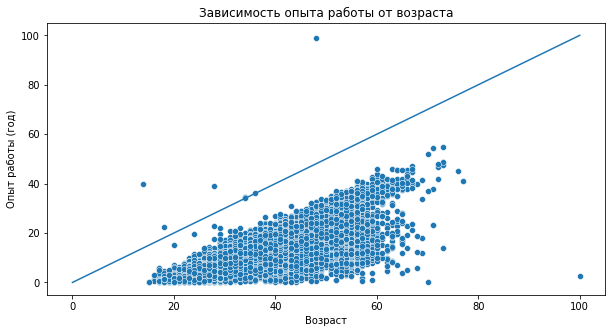

In [377]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(10, 5))
scatter_data = hh_data.copy()
scatter_data['Опыт работы (год)'] = scatter_data['Опыт_месяц']/12
sns.lineplot(x=[0, 100], y=[0, 100])
ax = sns.scatterplot(
    data=scatter_data, 
    x='Возраст',
    y='Опыт работы (год)',
)
ax.set_title('Зависимость опыта работы от возраста');

На графике видны явные аномалии - соискатели, чей возраст совпадает или меньше опыта работы

In [378]:
dupl_data = hh_data.duplicated(subset = hh_data.columns)
print(dupl_data[dupl_data ==True].shape[0])
data = hh_data.drop_duplicates()

165


In [379]:
null_data = data.isnull().sum()
display(null_data[null_data > 0])

Последнее/нынешнее место работы        1
Последняя/нынешняя должность           2
Опыт_месяц                           168
Командировки                          76
Переезд и Ком                         76
currency                           42308
date                               42308
Опыт работы (год)                    168
dtype: int64

In [380]:
data = data.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])
data['Опыт_месяц'] = data['Опыт_месяц'].fillna(data['Опыт_месяц'].median())
print(round(data['Опыт_месяц'].mean()))

114


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [381]:
outliers = data[(data['ЗП_руб'] > 1e6) | (data['ЗП_руб'] < 1e3)]
data = data.drop(outliers.index)
print(outliers.shape[0])

89


In [382]:
mistake1 = data[data ['Опыт работы (год)'] >= data ['Возраст']]
data = data.drop(mistake1.index)
print(mistake1.shape[0])

7


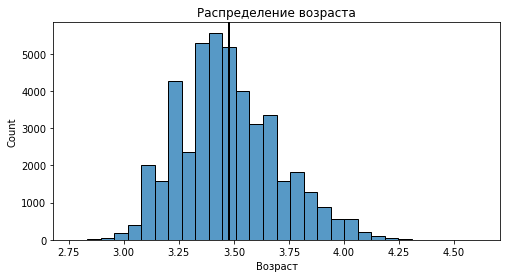

In [383]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_age = np.log(data['Возраст'] + 1)
histplot = sns.histplot(log_age, bins=30, ax=ax)
histplot.axvline(log_age.mean(), color='k', lw=2)
histplot.set_title('Распределение возраста');

В распределении обнаружен сдвиг в сторону младше 35 лет

In [384]:
def outliers_z_score_mod(data, feature, left=3, right=3, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned
outliers, data = outliers_z_score_mod(data, 'Возраст', left=3, right=4, log_scale=False)
display(outliers)
print(outliers.shape[0])

Ищет работу на должность:  \
152               Менеджер по работе с операторами связи   
850    постановщик задач, программист, руководитель I...   
1430                                Руководитель проекта   
2106   Разработчик. мультимедийных проектов. Организа...   
3271         Менеджер по продажам / Оператор на телефоне   
...                                                  ...   
40994                Программист, разработчик баз данных   
43381                               Программист Navision   
44363  Эксперт (специалист) по информационной безопас...   
44414         Инженер-электронщик Работы на дому у себя.   
44725                                         Копирайтер   

               Последнее/нынешнее место работы  \
152                             УралКалий, ОАО   
850                                 ОАО "ЭКОС"   
1430                             ООО Сталт ЛТД   
2106                           ООО "Агентство"   
3271         ООО "Гранд Евромебель" (удаленно)   
...                                        ...   
40994                 ООО "Геотрансинжиниринг"   
43381                         ООО ПРОФФИ-Стиль   
44363  ООО "КАБЕСТ", Группа компаний "Астерос"   
44414                                     Ч.П.   
44725               Интернет-магазин "OZON.ru"   

                            Последняя/нынешняя должность Обновление резюме  \
152                  Начальник отдела движения персонала        2019-07-04   
850                                начальник лаборатории        2019-05-14   
1430                               Руководитель проектов        2019-04-21   
2106                                    Главный редактор        2019-05-13   
3271                      Менеджер по работе с клиентами        2019-11-05   
...                                                  ...               ...   
40994                Вед. специалист Технического отдела        2018-07-09   
43381                            Программист-разработчик        2019-04-26   
44363  Директор департамента, Руководитель службы Гла...        2019-04-26   
44414                    Инженер-конструктор-электронщик        2019-08-04   
44725  копирайтер, контент-менеджер, администратор сайта        2019-08-04   

                                 Авто         Образование Пол  Возраст  \
152                        Не указано  Высшее образование   Ж       72   
850                        Не указано  Высшее образование   М       71   
1430                       Не указано  Высшее образование   М       64   
2106                       Не указано  Высшее образование   М       68   
3271   Имеется собственный автомобиль  Высшее образование   М       64   
...                               ...                 ...  ..      ...   
40994                      Не указано  Высшее образование   М       64   
43381                      Не указано  Высшее образование   М       68   
44363                      Не указано  Высшее образование   М       70   
44414                      Не указано  Высшее образование   М       65   
44725                      Не указано  Высшее образование   М       68   

       Опыт_месяц             Город  ...  стажировка вахтовый метод валюта  \
152         504.0            другое  ...       False          False    RUB   
850         281.0            Москва  ...       False          False    RUB   
1430        421.0   Санкт-Петербург  ...       False          False    RUB   
2106        480.0            Москва  ...       False          False    RUB   
3271        347.0            Москва  ...       False          False    RUB   
...           ...               ...  ...         ...            ...    ...   
40994       248.0            Москва  ...       False          False    RUB   
43381       224.0            Москва  ...       False          False    RUB   
44363       622.0            Москва  ...       False          False    RUB   
44414       545.0  город-миллионник  ...        True          False    RUB   
44725       149.0        

81


Дополнительное задание:
Распределение желаемой з/п от пола

In [385]:
box_data = hh_data[hh_data['ЗП_руб']<1e6]
fig = px.box(
    data_frame=box_data,
    x='Пол',
    y='ЗП_руб',
    color='Пол',
    title='Распределение зарплаты в зависимости от пола'
)
fig.show()


Как видно из распределения среднее значение, медиана и разброс больше у мужчин (медиана - 60 тысяч рублей), в то время как у женщин медианное значение - 48 тысяч. 

Дополнительное задание:
Распределение заработной платы в зависимости от города и возраста

In [387]:
pivot_d = pd.pivot_table(hh_data, index = 'Возраст', columns = 'Город', values = 'ЗП_руб', aggfunc = 'median')
px.imshow(pivot_d, title='Медианная з/п по городу и возрасту')

Как видно из тепловой карты - наибольшие значения з/п ожидаются в Москве, причем в увеличением возраста увеличивается ожидание з/п(для 20 лет - 50 тысяч, для 40 -120-130 тысяч рублей). В Санкт-Петербурге значения зарплаты для возрастной группы 35 лет-42 года находится на уровне 80 тысяч (что в 1,5 раза меньше, чем аналогичный показатель в Москве). При этом для городов-миллионников и других городов значения з/п приблизительно похожи и колеблются в районе 25-50 тысяч рублей в месяц